In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

column_names = ['Last Name','First Name','Dyslexia','Academic Level','Special Ed','ESL Level','Behavior','Management Index']
df = pd.read_csv('DataSet2.csv', names = column_names) #read CSV into Python as a dataframe

X = df.drop(columns=['Last Name', 'First Name', 'Management Index']) #indpendent variables
y = df[['Management Index']].copy() #dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

from IPython.display import display_html 
X_train_styler = X_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Independents variables')
y_train_styler = y_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Dependents variables')
space = "\xa0" * 10 #space between columns
display_html(X_train_styler._repr_html_()+ space  + y_train_styler._repr_html_(), raw=True)

Independents variables 
 
 
   
 Dyslexia 
 Academic Level 
 Special Ed 
 ESL Level 
 Behavior 
 
 
 
 
 29 
 Yes 
 Low 
 No 
 nan 
 E 
 
 
 81 
 No 
 High 
 No 
 nan 
 E 
 
 
 15 
 No 
 High 
 No 
 nan 
 E 
 
 
 71 
 No 
 Low 
 No 
 nan 
 S 
 
 
 47 
 No 
 Low 
 No 
 nan 
 E 
 
 
 
          
 
 Dependents variables 
 
 
   
 Management Index 
 
 
 
 
 29 
 8 
 
 
 81 
 5 
 
 
 15 
 5 
 
 
 71 
 8 
 
 
 47 
 7

In [2]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
linear_reg_model_types = LinearRegression()
linear_reg_model_types.fit(X_train,y_train)
y_pred = linear_reg_model_types.predict(X_test)

sme = mean_squared_error(y_test, y_pred)
print('Mean squared error of this model is: ' + str(sme))

Mean squared error of this model is: 1.7009813268828067e-30


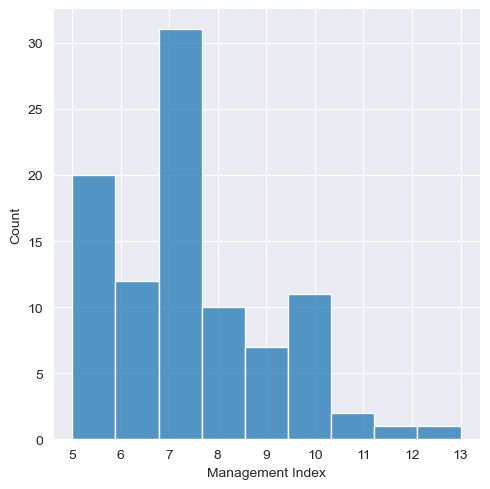

In [3]:
#Histogram depicting the distribution of Management Indexes within the whole dataset
sns.displot(df, x='Management Index', bins = 9)

([<matplotlib.patches.Wedge at 0x221b1be2de0>,
 [Text(-0.3743225163513971, 1.034351320273899, 'Excellent'),
  Text(0.19896868798973275, -1.0818555639269247, 'Satisfactory'),
  Text(1.0706592913891926, -0.252366166040522, 'Needs improvement'),
  Text(1.097594999944599, -0.07269949172185122, 'Unsatisfactory')])

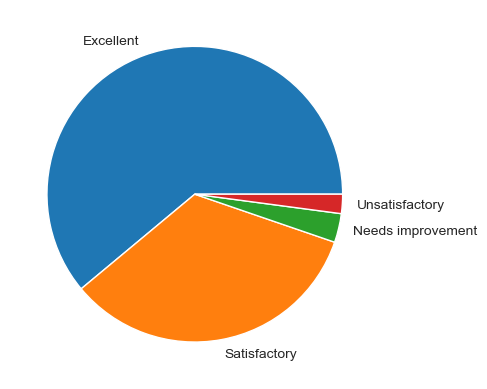

In [4]:
#Pie chart depicting the Behaviour grades of all students in data

labels = 'Excellent', 'Satisfactory', 'Needs improvement', 'Unsatisfactory'
sizes = [58, 32, 3, 2]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

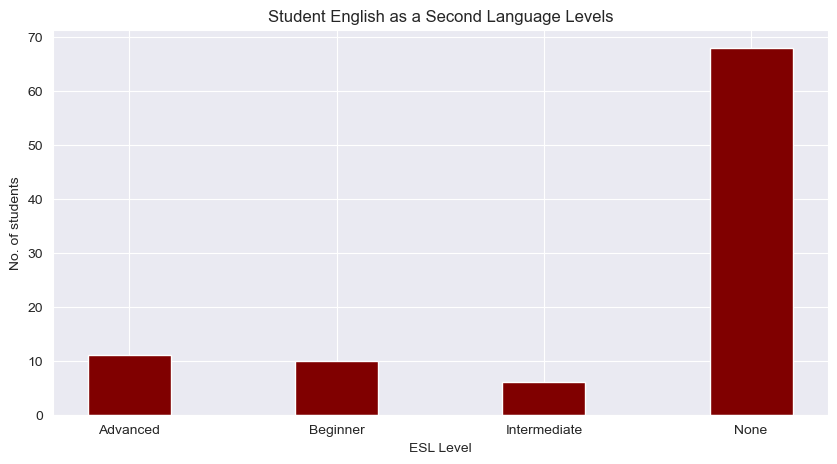

In [5]:
#Bar chart depicting the distribution of students based on ESL Level
data = {'Advanced':11, 'Beginner':10, 'Intermediate':6, 'None':68}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='Maroon', 
        width = 0.4)
plt.xlabel("ESL Level")
plt.ylabel("No. of students")
plt.title("Student English as a Second Language Levels")
plt.show()


In [6]:
dys=widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Dyslexia',
    disabled=False
)
aLev = widgets.RadioButtons(
    options=['High', 'Medium', 'Low'],
    description='Academic Level',
    disabled=False
)
sped = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Special Ed',
    disabled=False
)    
esl = widgets.RadioButtons(
    options=['None', 'Advanced', 'Intermediate', 'Beginner'],
    description='ESL Level',
    disabled=False
)
beh = widgets.RadioButtons(
    options=['Excellent', 'Satisfactory', 'Needs Improvement', 'Unsatisfactory'],
    description='Behaviour',
    disabled=False
)

column_names_short = ['Dyslexia_No','Dyslexia_Yes',
                      'Academic Level_High','Academic Level_Low','Academic Level_Medium',
                      'Special Ed_No','Special Ed_Yes',
                      'ESL Level_Advanced','ESL Level_Beginner','ESL Level_Intermediate',
                      'Behavior_E', 'Behavior_N','Behavior_S', 'Behavior_U']

def calSMI():
    newStudent = []
    if dys.value == 'Yes':
        newStudent.append(False)
        newStudent.append(True)
    if dys.value == 'No':
        newStudent.append(True)
        newStudent.append(False)
    if aLev.value == 'High':
        newStudent.append(True)
        newStudent.append(False)
        newStudent.append(False)
    if aLev.value == 'Medium':
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(True)
    if aLev.value == 'Low':
        newStudent.append(False)
        newStudent.append(True)
        newStudent.append(False)
    if sped.value == 'Yes':
        newStudent.append(False)
        newStudent.append(True)
    if sped.value == 'No':
        newStudent.append(True)
        newStudent.append(False)
    if esl.value == 'None':
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(False)
    if esl.value == 'Advanced':
        newStudent.append(True)
        newStudent.append(False)
        newStudent.append(False)
    if esl.value == 'Intermediate':
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(True)
    if esl.value == 'Beginner':
        newStudent.append(False)
        newStudent.append(True)
        newStudent.append(False)
    if beh.value == 'Excellent':
        newStudent.append(True)
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(False)
    if beh.value == 'Satisfactory':
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(True)
        newStudent.append(False)
    if beh.value == 'Needs Improvement':
        newStudent.append(False)
        newStudent.append(True)
        newStudent.append(False)
        newStudent.append(False)
    if beh.value == 'Unsatisfactory':
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(False)
        newStudent.append(True)
    input_df = pd.DataFrame(np.array([newStudent]), columns = column_names_short)
    smi = linear_reg_model_types.predict(input_df)[0]
    return smi

def on_button_clicked(b):
    with op:
        print(str(calSMI()))

button = widgets.Button(description="Get SMI")
output = widgets.Output()
button.on_click(on_button_clicked)
op = widgets.Output(layout={'border': '1px solid black'})
row1 = widgets.HBox([dys,aLev,sped,esl,beh])
row2 = widgets.VBox([button])
items = [row1,row2, op]
widgets.VBox(items)